# Python中的因子分析简介

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

### 导入所需的库

In [1]:
# Import required libraries
import pandas as pd
#from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn import linear_model
from factor_analyzer.factor_analyzer import calculate_kmo,calculate_bartlett_sphericity

In [2]:
import pkg_resources

In [3]:
pkg_resources.get_distribution("factor_analyzer").version

'0.3.1'

In [4]:
def mlr_ccn_value(value,value1,value2,value3):
    value_name,value1_name,value2_name,value3_name="CCN_1.0_cm3","T2m_NCEP","SS_1.0_mg","PM25"
    data=pd.DataFrame()
    data[value_name]=value
    data[value1_name]=value1
    data[value2_name]=value2
    data[value3_name]=value3
    data.dropna()
    X = data[[value1_name,value2_name,value3_name]].values.reshape(-1,3)
    y = data[value_name]
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    #predictions = lm.predict(X)
    #print(predictions[0:5])
    #输出我们模型的R²得分
    print(lm.score(X,y))
    cf=lm.coef_
    inter=lm.intercept_
    return cf[0],cf[1],cf[2],inter

def factor_analysis(df):
    #预处理数据
    df1=df
    # Dropping missing values rows
    df1.dropna(inplace=True)
    ccn=df1["CCN_1.0_cm3"]
    #df.drop(['FAC1', 'FAC2', 'FAC3', 'FAC4', 'FAC5', 'FAC6', 'FAC7', 'FAC8'],axis=1,inplace=True)
    df1.drop(['CCN_1.0_cm3','stid','rain',"rain208","rain820"],axis=1,inplace=True)
    #充分性测试
    chi_square_value,p_value=calculate_bartlett_sphericity(df1)
    print(chi_square_value, p_value)
    kmo_all,kmo_model=calculate_kmo(df1)
    print(kmo_model)
    fa = FactorAnalyzer(rotation=None)
    fa.fit(df1)
    # Check Eigenvalues
    ev, v = fa.get_eigenvalues()
    print(ev)
    plt.scatter(range(1,df1.shape[1]+1),ev)
    plt.plot(range(1,df1.shape[1]+1),ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, color='r', linestyle='-')
    plt.grid()
    plt.show()
    #执行因子分析
    fav= FactorAnalyzer(n_factors=3,rotation="varimax")
    fav.fit(df1)
    loading=fav.loadings_
    print(loading)
    #Calculate the eigenvalues特征值, given the factor correlation matrix
    eigenvalues=fav.get_eigenvalues()
    print("特征值",eigenvalues)
    # Calculate the communalities共通性, given the factor loading matrix.
    communalities=fav.get_communalities()
    print("共通性",communalities)
    # Get variance 方差 of each factors
    variance=fav.get_factor_variance()
    print("方差",variance)
    #Calculate the uniquenesses唯一性, given the factor loading matrix.
    uniquenesses=fav.get_uniquenesses()
    print("唯一性",uniquenesses)
    #Get the factor scores for new data set.
    trans=fav.transform(df)
    print(fav.transform(df).shape)
    return ccn,trans[:,0],trans[:,1],trans[:,2]

In [27]:
def factor_analysis(df1):
    #预处理数据
    # Dropping missing values rows
    df1.dropna(inplace=True)
    #print(df1.columns)
    ccn=df1["CCN_1.0_cm3"]
    #print(ccn)
    #df.drop(['FAC1', 'FAC2', 'FAC3', 'FAC4', 'FAC5', 'FAC6', 'FAC7', 'FAC8'],axis=1,inplace=True)
    df2=df1.drop(['CCN_1.0_cm3','stid',"Have","Hsd",'rain',"rain208","rain820"],axis=1,inplace=False)
    #充分性测试
    chi_square_value,p_value=calculate_bartlett_sphericity(df2)
    #print(chi_square_value, p_value)
    kmo_all,kmo_model=calculate_kmo(df2)
    #print(kmo_model)
    fa = FactorAnalyzer(rotation=None)
    print(df2.columns)
    print(df2.head())
    fa.fit(df2)
    # Check Eigenvalues
    ev, v = fa.get_eigenvalues()
    #print(ev)
    plt.scatter(range(1,df2.shape[1]+1),ev)
    plt.plot(range(1,df2.shape[1]+1),ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, color='r', linestyle='-')
    plt.grid()
    plt.show()
    #执行因子分析
    fav= FactorAnalyzer(n_factors=3,rotation="varimax")
    fav.fit(df2)
    loading=fav.loadings_
    #print(loading)
    #Calculate the eigenvalues特征值, given the factor correlation matrix
    eigenvalues=fav.get_eigenvalues()
    #print("特征值",eigenvalues)
    # Calculate the communalities共通性, given the factor loading matrix.
    communalities=fav.get_communalities()
    #print("共通性",communalities)
    # Get variance 方差 of each factors
    variance=fav.get_factor_variance()
    #print("方差",variance)
    #Calculate the uniquenesses唯一性, given the factor loading matrix.
    uniquenesses=fav.get_uniquenesses()
    #print("唯一性",uniquenesses)
    #Get the factor scores for new data set.
    trans=fav.transform(df2)
    #print(fav.transform(df).shape)
    return ccn,trans[:,0],trans[:,1],trans[:,2]

## 加载数据

In [6]:
df= pd.read_csv("yrd_ccn_new-all-pmcb1.csv")

Index(['CAPE_nc', 'CIN0', 'Cloud_fra', 'GH1000', 'GH500', 'GH700', 'GH850',
       'H_LCL_nc', 'H_tro', 'Have', 'Hcbs1.0', 'Hsd', 'Htop1.0', 'LTS', 'PBLH',
       'PR', 'PTEM700', 'PTEMS', 'PW', 'P_LCL_nc', 'P_tro', 'Pcb1.0', 'Press',
       'Ptop1.0', 'RH2m', 'Recb1.0', 'Retop1.0', 'SLI', 'SS_1.0_mg', 'T1000',
       'T2m_NCEP', 'T500', 'T700', 'T850', 'T_LCL_nc', 'T_coal1.0', 'T_tro',
       'Tcb1.0', 'Tskin_NCEP', 'Ttop1.0', 'Wb_1.0', 'PM25', 'PM25cb', 'PM10'],
      dtype='object')
   CAPE_nc  CIN0  Cloud_fra      GH1000        GH500        GH700  \
0      5.0 -0.61     0.5743   87.970001  5870.669922  3138.550049   
1     12.0 -0.01     0.7696  103.300003  5851.430176  3122.830078   
2     23.0 -0.71     0.5747  112.959999  5848.350098  3123.909912   
3      0.0 -0.81     0.1157  117.489998  5841.910156  3121.350098   
4      0.0 -0.21     0.3095  113.699997  5846.069824  3123.209961   

         GH850  H_LCL_nc    H_tro   Have  ...  T_LCL_nc  T_coal1.0  T_tro  \
0  1499.560059   

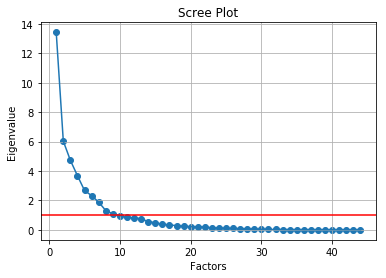

In [8]:
value,value1,value2,value3=factor_analysis(df)

In [9]:
mlr_ccn_value(value,value1,value2,value3)

0.230436284696


(43.805940126660495, 323.3298065014946, 44.246797935451418, 1147.7147839123538)

In [14]:
cf=df[(df["stid"]=="31.0121.0")]

In [21]:
cf1=df[(df["stid"]=="32.5120.0")]

In [24]:
cf2=df[(df["stid"]=="33.0120.0")]

In [12]:
df.head()

,CAPE_nc,CCN_1.0_cm3,CIN0,Cloud_fra,GH1000,GH500,GH700,GH850,H_LCL_nc,H_tro,...,Tskin_NCEP,Ttop1.0,Wb_1.0,stid,PM25,PM25cb,PM10,rain,rain208,rain820
0,5.0,1622.0,-0.61,0.5743,87.970001,5870.669922,3138.550049,1499.560059,1092.2,16511.0,...,30.84,6.0,0.99,29.0120.0,18.000000,5.941307,27.00,0.0,0.0,0.0
1,12.0,2164.0,-0.01,0.7696,103.300003,5851.430176,3122.830078,1500.099976,981.0,16627.0,...,25.86,-6.0,1.22,31.0121.0,15.250000,2.269237,33.00,0.0,0.0,0.0
2,23.0,503.0,-0.71,0.5747,112.959999,5848.350098,3123.909912,1499.530029,212.5,16647.0,...,20.60,-24.0,1.28,31.5119.5,21.875000,0.507255,39.25,42.0,0.0,42.0
3,0.0,153.0,-0.81,0.1157,117.489998,5841.910156,3121.350098,1501.020020,124.0,16669.0,...,19.59,-43.0,2.32,32.0119.0,11.250000,0.029086,30.00,19.5,0.0,19.5
4,0.0,402.0,-0.21,0.3095,113.699997,5846.069824,3123.209961,1498.010010,124.0,16669.0,...,19.48,-25.0,1.55,32.0118.0,13.333333,0.125628,17.00,211.0,54.0,157.0


In [26]:
cf2.to_csv("33.0120.0.csv")

/public/home/hysplit/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['CAPE_nc', 'CIN0', 'Cloud_fra', 'GH1000', 'GH500', 'GH700', 'GH850',
       'H_LCL_nc', 'H_tro', 'Hcbs1.0', 'Htop1.0', 'LTS', 'PBLH', 'PR',
       'PTEM700', 'PTEMS', 'PW', 'P_LCL_nc', 'P_tro', 'Pcb1.0', 'Press',
       'Ptop1.0', 'RH2m', 'Recb1.0', 'Retop1.0', 'SLI', 'SS_1.0_mg', 'T1000',
       'T2m_NCEP', 'T500', 'T700', 'T850', 'T_LCL_nc', 'T_coal1.0', 'T_tro',
       'Tcb1.0', 'Tskin_NCEP', 'Ttop1.0', 'Wb_1.0', 'PM25', 'PM25cb', 'PM10'],
      dtype='object')
    CAPE_nc  CIN0  Cloud_fra     GH1000        GH500        GH700  \
27    577.5 -0.13     0.0696  53.510000  5859.050049  3121.079956   
30    756.0  0.29     0.7522  43.340000  5825.660156  3102.570068   
36    561.0 -0.13     0.1002  41.709999  5843.180176  3105.870117   
44    487.0 -0.03     0.2808  23.450001  5850.339844  3098.639893   
60    225.0 -2.14     0.0541 -14.750000  5791.540039  3054.679932   

          GH850  H_LCL_nc    H_tro  Hcbs1.0  ...  T_LCL_nc  T_coal1.0  T_tro  \
27  1473.965027    759.35  16

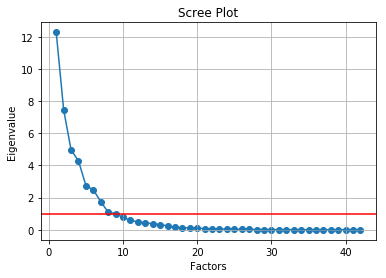

In [28]:
value,value1,value2,value3=factor_analysis(cf2)

In [23]:
mlr_ccn_value(value,value1,value2,value3)

0.90573251468


(-210.81160144180396,
 -491.8689094527964,
 2.0277514195488329,
 -2492.8265792516345)

### 预处理数据

# issue
同样的问题。解决了安装先前版本的因子分析器的问题：

pip install factor_analyzer == 0.3.1

非常感谢Avinash教程。

by liuchongcn@126.com @NJU 2019-07-08

![简书](https://raw.githubusercontent.com/xigrug/xigrug.github.io/master/picture/jianshuQR1.jpg)